# Aula 7 - Exercícios Extra - Pandas Parte 3 (Merge e Join)


In [ ]:
#@title Init Cell - Execute-me!!!
import sys
from datetime import datetime
import requests
import time
from requests.utils import quote

url = 'https://docs.google.com/forms/d/e/1FAIpQLSeASSC8-w8FmfodZ4lBnuSEAvYuE4vatIBowLIREG1f-2pIpA/formResponse?usp=pp_url&entry.1986154915=mbacd&entry.513694412=2021&entry.1914621244=CienciaDeDados'

def format_values(values):
    return {
        "entry.1269959472": values['student_id'],
        "entry.1799867692": str(values['exercise_number']).replace(".", "_"),
        "entry.886231469": values['exercise_score'],
        "entry.1491599254": values['exercise_extra'],
        "entry.1342537331": values['id']
    }

def send_attendance(url, data):
    count = 0
    while count < 3:
        count += 1
        try:
          r = requests.post(url, data=data)
          break
        except:
          print("Error Occured!")
          time.sleep(2)

def validate(func, inputs, outfunc, outputs, exercise_number, exercise_extra):
  answers_status = True
  for k, v in zip(inputs, outputs):
    ans = func(*k)
    outans = outfunc(ans)
    try:
        if isinstance(ans, pd.DataFrame) and isinstance(v, pd.DataFrame):
            result = outans.equals(v)
        elif (isinstance(ans, np.ndarray) or isinstance(outans, np.ndarray)) and isinstance(v, np.ndarray):
            result = np.array_equal(outans, v)
        else:
            result = outfunc(ans) == v
        if not result:
          answers_status = False
          print(f"Resposta incorreta. {func.__name__}({k}) deveria ser {v}, mas retornou {ans}")
    except ValueError as ve:
        print(ve)
        pass
        if not result.all():
          answers_status = False
          print(f"Resposta incorreta. {func.__name__}({k}) deveria ser {v}, mas retornou {ans}")

  if answers_status:
      student_email=!gcloud config get-value account
      if not student_email or 'unset' in student_email[0]:
        !gcloud auth login
        student_email=!gcloud config get-value account
      exercise_score = True
      values = {"exercise_number": exercise_number, "student_id": student_email[0],
                "exercise_points": 1, "exercise_score": exercise_score, 
                "exercise_extra": exercise_extra,
                "id": f"{student_email[0]}_{exercise_number}"}
      final_data = format_values(values)
      send_attendance(f"{url}&emailAddress={quote(str(student_email[0]))}", final_data)
      return "Parabéns!"
  else:
      return False


In [ ]:
# Importe as bibliotecas pandas, numpy, glob
import pandas as pd
import numpy as np

### Cole na célula abaixo as funções merge_pop_pib e pib_percapita dos exercícios 7.1 e 7.2. Elas deverão ser utilizadas nesse notebook.

In [ ]:
def merge_pop_pib(path_pop, path_pib):
    """retorne um dataframe resultante do merge dos dados do pib e da população
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    
def pib_percapita(pib_pop):
    """retorne retorne um dataframe contendo o codigo ibge de 7 caracteres,
       o nome do municipio e seu PIB percapita.
    """
    # Cole aqui o conteúdo da sua função do exercício 7.2
    # YOUR CODE HERE
    raise NotImplementedError()
    

### 7.5 Faça o merge do dataset de contendo o pib percapita com o dataset do índice de gini. 
#### Dica: Use como identificador dos registros o código do IBGE. Preste atenção na quantidade de caractéres do código de cada dataset e no seu format (texto ou número). Faça sempre merge com chaves compatíveis (mesmo tipo).
#### Curiosidade: Os municípios com maior pib percapita são aqueles com melhor índice de gini? Comente com o professor e colegas os resultados à luz de exemplos concretos do seu resultado deste exercício.


In [ ]:
def merge_pib_percapita_gini(path_pop, path_pib, path_gini):
    """retorne o merge dos datasets de gini e morbidade.
    """
    # YOUR CODE HERE
    raise NotImplementedError()



In [ ]:
## Faça seus testes aqui
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'
path_gini = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/gini/ginibr.csv'



In [ ]:
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'
path_gini = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/gini/ginibr.csv'

entradas = [[path_pop, path_pib, path_gini]]
saidas = [{'uf': 'RO', 'cod_uf': '11', 'cod_munic': '00015', 'municipio_x': "Alta Floresta D'Oeste",
 'pop2017': 25437, 'cod_ibge7': '1100015', 'nivel': 'MU', 'municipio_y': "Alta Floresta D'Oeste (RO)",
 '2007': 191364, '2009': 256986, '2011': 280510, '2013': 341325, '2015': 421300,
 '2017': 498864, 'cod_ibge6': '110001', 'pib_percapita': 19.6, 'Município': "Alta Floresta D'Oeste",
 '1991': 0.5983, '2000': 0.5868, '2010': 0.5893}]
validate(merge_pib_percapita_gini, entradas, lambda x: x.iloc[0].to_dict(), saidas, "7.5", True)

### 7.6 Escreva uma função para contar quantos nomes dos mesmos municípios são diferentes nas bases de dados do PIB e da população. 
#### A coluna do nome dos municípios no dataset de PIB contém também o nome da UF. Remova o nome da UF, por exemplo, removendo os 5 últimos caracteres da string do nome do município, antes de efetuar a comparação.
#### Dica 1: use a função map (element-wise) do objeto series, ou seja, sobre a coluna col2 do dataframe df.
#### Dica 2: passe uma função lambda para o metodo map que executa as instruções do enunciado.
#### Dica 3: compare o resultado da execução da funcao map com a coluna col1
#### Dica 4: retorne a quantidade de diferenças resultantes da comparação
#### Interprete este resultado. O que você pode extrair de aprendizado deste resultado? 

In [ ]:
def compare_df_cols(df, col1, col2):
    """retorne a quantidade de registros em que o valor do registro na coluna col1 difere do valor em col2
    """
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
## Faça seus testes aqui



In [ ]:
# Validação
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'

df_pib_pop = merge_pop_pib(path_pop, path_pib)
entradas = [[df_pib_pop, 'municipio_x', 'municipio_y']]
saidas = [16]
validate(compare_df_cols, entradas, lambda x: x, saidas, "7.6", True)

### 7.7 Escreva uma função para colocar num mesmo dataframe os dados de PIB percapita e índice de gini dos municípios brasieiros. 
#### Retorne os registros completos pelo menos os atributos 'pib_percapita', 'cod_ibge6', '1991', '2000' e '2010' dos top 10 registros com maiores PIB percapita.

#### Dica 1: Use as funções criadas nos exercícios 4, 5 e 6 desta aula.
#### Dica 2: Ao ler o arquivo CSV do índice de gini, se preciso, use encoding='utf8' como parâmetro do método read_csv

#### Sugestão: Analise a diferença entre os quartis (do PIB percapita e do índice de gini) dos top 10 municípios, em termos de PIB percapita,  e os quartis de todo o brasil para estas mesmas duas variáveis. Responda: um PIB percapita significativamente maior, tem ajudado a melhorar o índice de Gini nesses municípios ? Dica: use o método describe(). 



In [ ]:
def top10_municipios(path_pib, path_gini, path_pop):
    """retorne um dataframe contendo os 10 municipios com maiores PIB percapita. O dataframe deve conter também 
    o valor do índice de gini e nome, UF e código ibge do respectivo município.
    """
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
## Faça seus testes aqui
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_gini = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/gini/ginibr.csv'
path_pop= 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'


In [ ]:
# Validação
path_pib = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/pib/pib_municipios.xlsx'
path_gini = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/gini/ginibr.csv'
path_pop='https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'

test_data = {'pib_percapita': 344.8, 'cod_ibge6': '353650', '1991': 0.49, '2000': 0.5734, '2010': 0.488}
entradas = [[path_pib, path_gini, path_pop]]
saidas = [test_data]
validate(top10_municipios, entradas, lambda x: x[['pib_percapita', 'cod_ibge6', '1991', '2000', '2010']].iloc[0].to_dict(), saidas, "7.7", True)

### 7.8 Usando funções numpy, crie uma imagem igual a imagem a seguir. Sua função deve receber dois argumentos, o tamanho dos tiles (azulejos) e a quantidade de vezes que esses tiles serão repetidos (justapostos lado a lado) em cada uma das dimensões. Retorne um objeto Image da biblioteca PIL.
#### Exemplo: para esses valores ```tile_size=9``` e ```rep=3```, o resultado esperado é o da imagem a seguir.

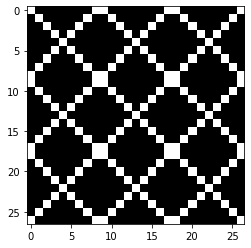
### link para a imagem: https://drive.google.com/file/d/1QpZmAe8gcaUdB-Mr0h5Mm17ljg9hxLYV/view?usp=sharing

In [ ]:
import urllib.request
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from bitarray import bitarray 
%matplotlib inline

def pattern_image(tile_size, rep):
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
# Faça seus testes aqui
img = pattern_image(9, 3)
imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255)


In [ ]:
img = pattern_image(9, 3)
entradas = [[9, 3]]
result = np.array([[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255],
[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255],
[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,0,255,0,0,0,0],
[0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0,0,0,0,255,0,255,0,0,0],
[0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0],
[0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0,0,255,0,0,0,0,0,255,0],
[255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,255]],dtype=np.uint8)
saidas = [result]
validate(pattern_image, entradas, lambda x: np.asarray(x), saidas, "7.8", True)